In [1]:
import pyemma
import mdtraj as md  
import pandas as pd 

In [60]:
import subprocess

In [2]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
from glob import glob 

In [234]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (7, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
          'xtick.labelsize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
          'xtick.major.size':5,
          'xtick.major.width':1,
          'ytick.major.size':5,
          'ytick.major.width':1,
        'axes.linewidth':2}
plt.rcParams.update(params)

In [181]:
def px_color(Num):
    a=pd.read_csv('~/.matplotlib/color.txt',header=None)
    px_colors=['']
    for i in range(0,len(a)):
        px_colors.append(a.iloc[i,:])
    aa=tuple(px_colors[Num])
    return aa

In [5]:
def parse_line(raw_line, delimiter=' '):
    line = []
    for i in raw_line.strip().split(delimiter):
        if i != '':
            line.append(i)
    return line

In [11]:
def score2df(score_file):
    f = open(score_file)
    raw_data = f.readlines()
    f.close()
    data = []
    for i in raw_data[2:]:
        line = parse_line(i)
        data.append(line)
    cols = parse_line(raw_data[1])
    df = pd.DataFrame(data, columns=cols)
    df.iloc[:,1:-1] = df.iloc[:,1:-1].astype(float)
    return df

In [25]:
df = score2df('../output_state2/score.sc')

In [28]:
df.sort_values('total_score')

,SCORE:,total_score,Grid_score,Transform_accept_ratio,angle_constraint,atom_pair_constraint,chainbreak,classic_grid_X,coordinate_constraint,dihedral_constraint,...,if_X_pro_close,if_X_ref,interface_delta_X,ligand_is_touching_X,omega,p_aa_pp,pro_close,ref,total_score_X,description
35,SCORE:,-871.304,-22.0,0.729,0.0,0.0,0.0,-24.0,2.228,0.0,...,0.0,0.0,-12.104,1.0,256.869,-49.034,191.251,-86.47,-24.0,state2_ready_0036
979,SCORE:,-869.423,-24.0,0.701,0.0,0.0,0.0,-24.0,3.377,0.0,...,0.0,0.0,-7.188,1.0,255.49,-47.308,190.89,-86.47,-24.0,state2_ready_0980
820,SCORE:,-866.024,-21.0,0.73,0.0,0.0,0.0,-24.0,3.271,0.0,...,0.0,0.0,-7.48,1.0,254.381,-47.481,190.921,-86.47,-24.0,state2_ready_0821
588,SCORE:,-865.185,-23.0,0.719,0.0,0.0,0.0,-23.0,3.091,0.0,...,0.0,0.0,-9.453,1.0,255.9,-49.594,191.27,-86.47,-23.0,state2_ready_0589
992,SCORE:,-864.022,-23.0,0.722,0.0,0.0,0.0,-24.0,2.754,0.0,...,0.0,0.0,-7.502,1.0,255.47,-47.917,191.259,-86.47,-24.0,state2_ready_0993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,SCORE:,-791.837,-20.0,0.725,0.0,0.0,0.0,-24.0,6.01,0.0,...,0.0,0.0,-1.007,1.0,257.293,-46.72,200.374,-86.47,-24.0,state2_ready_0743
153,SCORE:,-789.315,-20.0,0.718,0.0,0.0,0.0,-24.0,5.579,0.0,...,0.0,0.0,-6.573,1.0,257.859,-47.145,202.566,-86.47,-24.0,state2_ready_0154
833,SCORE:,-788.414,-19.0,0.72,0.0,0.0,0.0,-23.0,8.904,0.0,...,0.0,0.0,-8.082,1.0,261.391,-47.34,199.996,-86.47,-23.0,state2_ready_0834
612,SCORE:,-786.558,-17.0,0.711,0.0,0.0,0.0,-21.0,4.299,0.0,...,0.0,0.0,-6.924,1.0,258.471,-49.137,216.613,-86.47,-21.0,state2_ready_0613


In [154]:
# convert docking result to xtcfile
import os.path

def docking2xtc(output_dir):
    if not os.path.isfile(f'{output_dir}/docking_merged.xtc'):
        subprocess.run(f'mdconvert {output_dir}/*pdb -o {output_dir}/docking_merged.xtc', shell=True)
    
for i in range(0, 9):
    output_dir = f'../output_state{i}'
    docking2xtc(output_dir)
    #print(output_dir)

converted 1000 frames, 8097 atoms 


converted 1000 frames, 8097 atoms 


In [155]:
#compute d1 for top200 structures
def compute_d1(traj):
    atom_1 = int(traj.topology.select('residue 225 and name OG'))
    atom_2 = int(traj.topology.select('resname MHE and name C8'))
    atom_pair = np.array([[atom_1, atom_2]])
    d1 = md.compute_distances(traj,atom_pair)
    return d1

def compute_d2(traj):
    atom_1 = int(traj.topology.select('residue 225 and name OG'))
    atom_2 = int(traj.topology.select('residue 528 and name ND1'))
    atom_pair = np.array([[atom_1, atom_2]])
    d2 = md.compute_distances(traj,atom_pair)
    return d2

def compute_d3(traj):
    atom_1 = int(traj.topology.select('residue 528 and name NE2'))
    atom_2 = int(traj.topology.select('residue 492 and name OD1'))
    atom_3 = int(traj.topology.select('residue 492 and name OD2'))
    atom_pair = np.array([[atom_1, atom_2], [atom_1, atom_3]])
    d3 = md.compute_distances(traj,atom_pair)
    return np.minimum(d3[:,0], d3[:,1])

d1s = []
d2s = []
d3s = []
for i in range(0,9):
    topfile = f'../output_state{i}/state{i}_ready_0001.pdb'
    traj = md.load(f'../output_state{i}/docking_merged.xtc' ,top=topfile)
    df = score2df(f'../output_state{i}/score.sc')
    index = df.sort_values('total_score').index
    d1_i = compute_d1(traj[index[:200]])
    d1s.append(d1_i)
    d2_i = compute_d2(traj[index[:200]])
    d2s.append(d2_i)
    d3_i = compute_d3(traj[index[:200]])
    d3s.append(d3_i)

In [172]:
ax.flatten()[i]

<AxesSubplot:>

In [202]:
cols = [f'MS{i+1}' for i in range(9)]

In [203]:
cols

['MS1', 'MS2', 'MS3', 'MS4', 'MS5', 'MS6', 'MS7', 'MS8', 'MS9']

In [213]:
pd.Series(d1s[0].reshape(-1))

0      0.754359
1      0.585308
2      0.640406
3      0.501272
4      0.712161
         ...   
195    0.530251
196    0.449690
197    0.556792
198    0.485651
199    0.328691
Length: 200, dtype: float32

In [212]:
d1s[0].shape()

(200, 1)

In [214]:
df = pd.DataFrame(columns=cols)
for i in range(len(d1s)):
    ser = pd.Series(d1s[i].reshape(-1))
    df[cols[i]] = ser

In [175]:
ax_i.set_title('aa')

Text(0.5, 1.0, 'aa')

In [199]:
len(d1s)

9

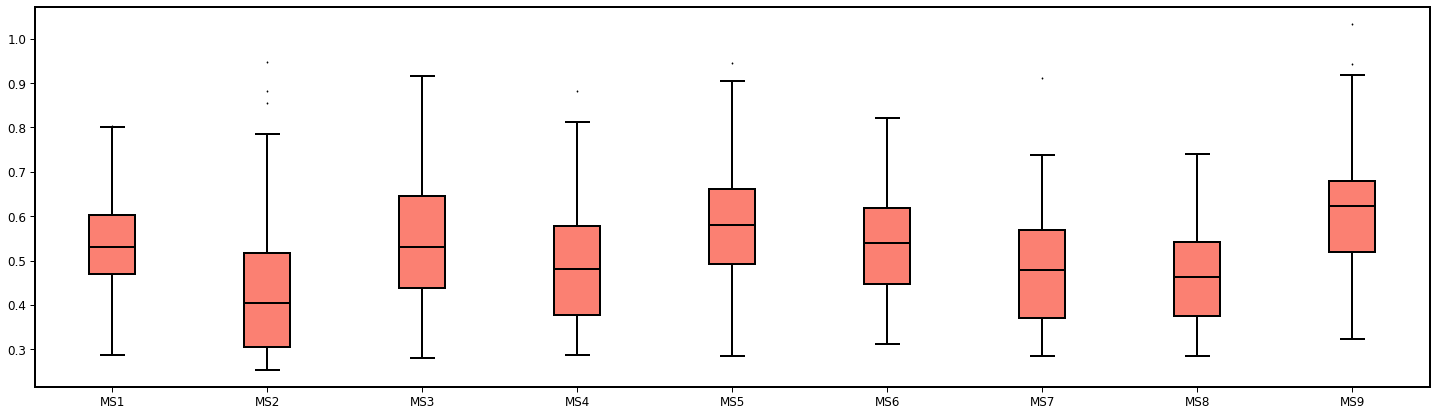

In [235]:
fig, ax = plt.subplots(figsize=(25, 7))
ax=sns.boxplot(data=df,width=0.3,fliersize=1,color="k",linewidth=2) 
for i,mybox in enumerate(ax.artists):
    mybox.set_alpha(1)
    mybox.set_facecolor(px_color(204))

plt.savefig('MS1-MS9_docking_d1_distribution_box.png', dpi=300)
#$sns.boxplot(data=df, width=.6, palette="vlag")
#sns.despine(offset=10, trim=True)

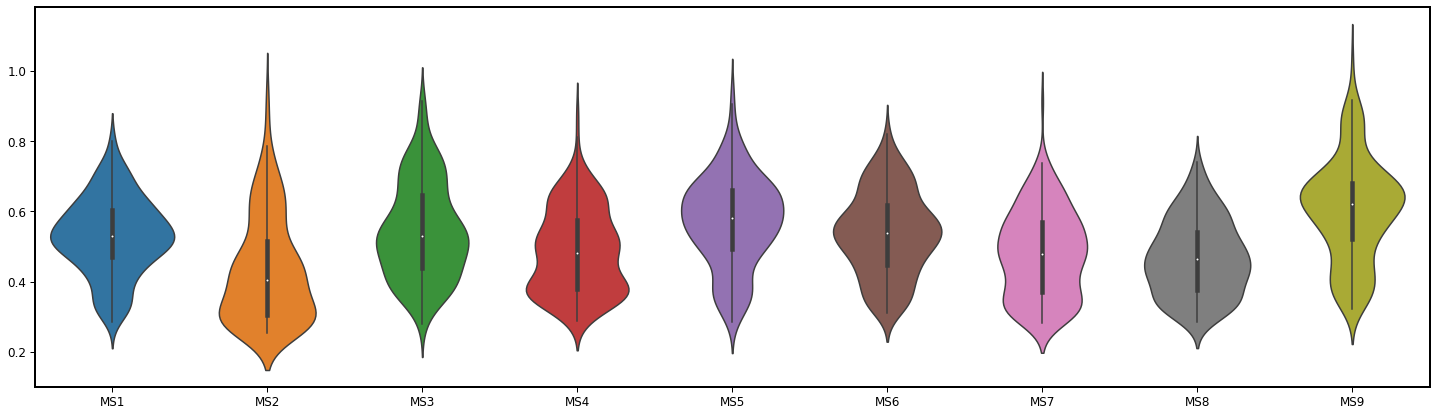

In [237]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.violinplot(data=df, ax=ax)
plt.savefig('MS1-MS9_docking_d1_distribution.png', dpi=300)

In [162]:
# 根据以上docking score top200结构中d1的分布可以将MS1-MS9区分为活性状态和非活性状态
# 活性状态 MS2, MS4, MS7, MS8
# 非活性状态MS1, MS3, MS5, MS6, MS9

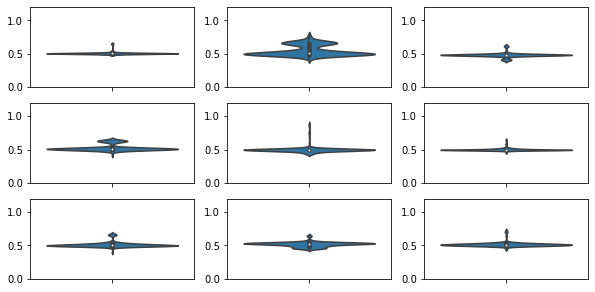

In [159]:
fig,ax=plt.subplots(3,3, figsize=(10,5))
for i in range(9):
    sns.violinplot(y=d2s[i], ax=ax.flatten()[i])
    ax.flatten()[i].set_ylim(0, 1.2)
#plt.hist()

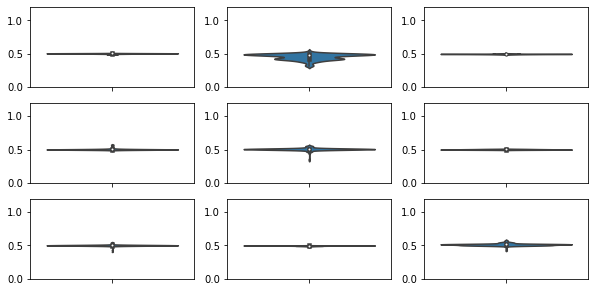

In [160]:
fig,ax=plt.subplots(3,3, figsize=(10,5))
for i in range(9):
    sns.violinplot(y=d3s[i], ax=ax.flatten()[i])
    ax.flatten()[i].set_ylim(0, 1.2)
#plt.hist()

In [42]:
traj[index[:100]]

<mdtraj.Trajectory with 100 frames, 8097 atoms, 562 residues, without unitcells at 0x1a6fe3640>

In [129]:
d1s[0][:10]

array([[0.7543586 ],
       [0.5853078 ],
       [0.640406  ],
       [0.50127214],
       [0.7121609 ],
       [0.44286665],
       [0.7346298 ],
       [0.6901977 ],
       [0.3414281 ],
       [0.6105629 ]], dtype=float32)

In [130]:
d2s[0][:10]

array([[0.7543586 ],
       [0.5853078 ],
       [0.640406  ],
       [0.50127214],
       [0.7121609 ],
       [0.44286665],
       [0.7346298 ],
       [0.6901977 ],
       [0.3414281 ],
       [0.6105629 ]], dtype=float32)

In [32]:
df.sort_values('total_score')

,SCORE:,total_score,Grid_score,Transform_accept_ratio,angle_constraint,atom_pair_constraint,chainbreak,classic_grid_X,coordinate_constraint,dihedral_constraint,...,if_X_pro_close,if_X_ref,interface_delta_X,ligand_is_touching_X,omega,p_aa_pp,pro_close,ref,total_score_X,description
35,SCORE:,-871.304,-22.0,0.729,0.0,0.0,0.0,-24.0,2.228,0.0,...,0.0,0.0,-12.104,1.0,256.869,-49.034,191.251,-86.47,-24.0,state2_ready_0036
979,SCORE:,-869.423,-24.0,0.701,0.0,0.0,0.0,-24.0,3.377,0.0,...,0.0,0.0,-7.188,1.0,255.49,-47.308,190.89,-86.47,-24.0,state2_ready_0980
820,SCORE:,-866.024,-21.0,0.73,0.0,0.0,0.0,-24.0,3.271,0.0,...,0.0,0.0,-7.48,1.0,254.381,-47.481,190.921,-86.47,-24.0,state2_ready_0821
588,SCORE:,-865.185,-23.0,0.719,0.0,0.0,0.0,-23.0,3.091,0.0,...,0.0,0.0,-9.453,1.0,255.9,-49.594,191.27,-86.47,-23.0,state2_ready_0589
992,SCORE:,-864.022,-23.0,0.722,0.0,0.0,0.0,-24.0,2.754,0.0,...,0.0,0.0,-7.502,1.0,255.47,-47.917,191.259,-86.47,-24.0,state2_ready_0993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,SCORE:,-791.837,-20.0,0.725,0.0,0.0,0.0,-24.0,6.01,0.0,...,0.0,0.0,-1.007,1.0,257.293,-46.72,200.374,-86.47,-24.0,state2_ready_0743
153,SCORE:,-789.315,-20.0,0.718,0.0,0.0,0.0,-24.0,5.579,0.0,...,0.0,0.0,-6.573,1.0,257.859,-47.145,202.566,-86.47,-24.0,state2_ready_0154
833,SCORE:,-788.414,-19.0,0.72,0.0,0.0,0.0,-23.0,8.904,0.0,...,0.0,0.0,-8.082,1.0,261.391,-47.34,199.996,-86.47,-23.0,state2_ready_0834
612,SCORE:,-786.558,-17.0,0.711,0.0,0.0,0.0,-21.0,4.299,0.0,...,0.0,0.0,-6.924,1.0,258.471,-49.137,216.613,-86.47,-21.0,state2_ready_0613


In [7]:
pdb_list = glob('*pdb')
pdb_list.sort()

In [8]:
traj = md.load('merged.xtc', top='5bwf_A_RDD_00001.pdb') 

In [22]:
traj.topology.select('resid 3')

In [32]:
traj.topology.select('resname RDD and name O25')

array([7443])

In [37]:
traj.topology.select('residue 172 and name OE1')

array([2695])

In [38]:
traj.topology.select('residue 172 and name OE2')

array([2696])

In [39]:
traj.topology.select('residue 373 and name OE1')

array([5835])

In [40]:
dis = md.compute_distances(traj, [[7443,2695], [7443, 5835]])

In [41]:
dis[:,0]

array([1.5063044 , 1.2524233 , 1.4141494 , ..., 0.70625556, 1.4874036 ,
       1.5940154 ], dtype=float32)

(0.0, 4.0)

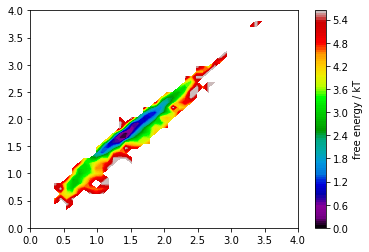

In [42]:
mplt.plot_free_energy(dis[:,0], dis[:,1])
plt.xlim(0,4)
plt.ylim(0,4)

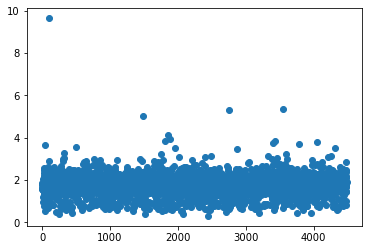

In [43]:
plt.scatter(range(traj.n_frames), dis[:,1])

In [48]:
binding_frames = []
for i in range(traj.n_frames):
    if dis[:,0][i] < 0.8 and dis[:,1][i] < 0.5:
        binding_frames.append(i)

In [49]:
t = traj[binding_frames]

In [50]:
t.save_xtc('binding.xtc')

In [51]:
for i in binding_frames:
    print(pdb_list[i], f'{dis[i,0]:.2f}', f'{dis[i,1]:.2f}', get_energy(pdb_list[i][:-4], 47))

5bwf_A_RDD_00187.pdb 0.55 0.49 27.149
5bwf_A_RDD_00233.pdb 0.55 0.38 677.861
5bwf_A_RDD_00400.pdb 0.35 0.45 45.497
5bwf_A_RDD_01381.pdb 0.32 0.38 79.965
5bwf_A_RDD_01881.pdb 0.62 0.41 59.849
5bwf_A_RDD_02223.pdb 0.57 0.30 238.926
5bwf_A_RDD_02908.pdb 0.56 0.43 108.650
5bwf_A_RDD_03416.pdb 0.40 0.44 2347.578
5bwf_A_RDD_0475.pdb 0.61 0.42 28.233


In [52]:
pdb_list[i]

'5bwf_A_RDD_0475.pdb'